In [103]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [104]:
%%html
<div id="toc"></div>

In [105]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [106]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [107]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [108]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [109]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [110]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [111]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Thu Apr 23 18:26:13 2020 +0200**

In [112]:
plt.rcParams['figure.figsize'] = [20, 7]

In [113]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=14)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [114]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [115]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [116]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
23-Apr-20         2646            -851     3033       464        -1051   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  
                                                                            
23-Apr-20        -934          -117            200           -851    66658

### I dati cumulati di oggi

In [117]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
23-Apr-20       189973         106848    57576     25549        25138   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
23-Apr-20       22871          2267          81710  1579909

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

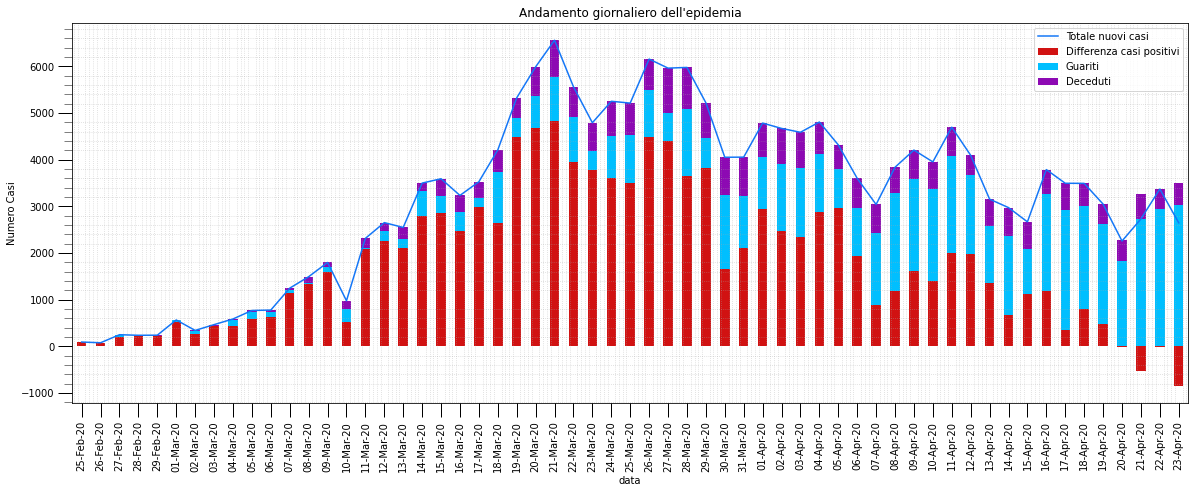

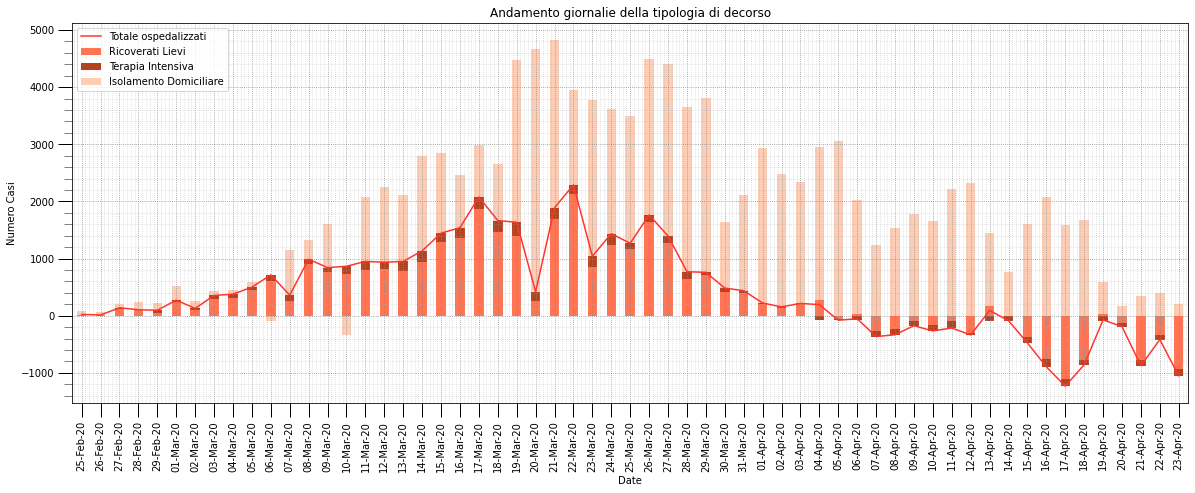

In [118]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['nuovi_attualmente_positivi','dimessi_guariti','deceduti']
legends = ["Differenza casi positivi","Guariti","Deceduti"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, stacked=True, ax=ax)

legends = ["Totale ospedalizzati"]
colors = [COL_TOT_RICOVERATI]
aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends, ax=aw)
aw.set_title("Andamento giornalie della tipologia di decorso")
aw.set_ylabel('Numero Casi')
beautify_graph(aw)



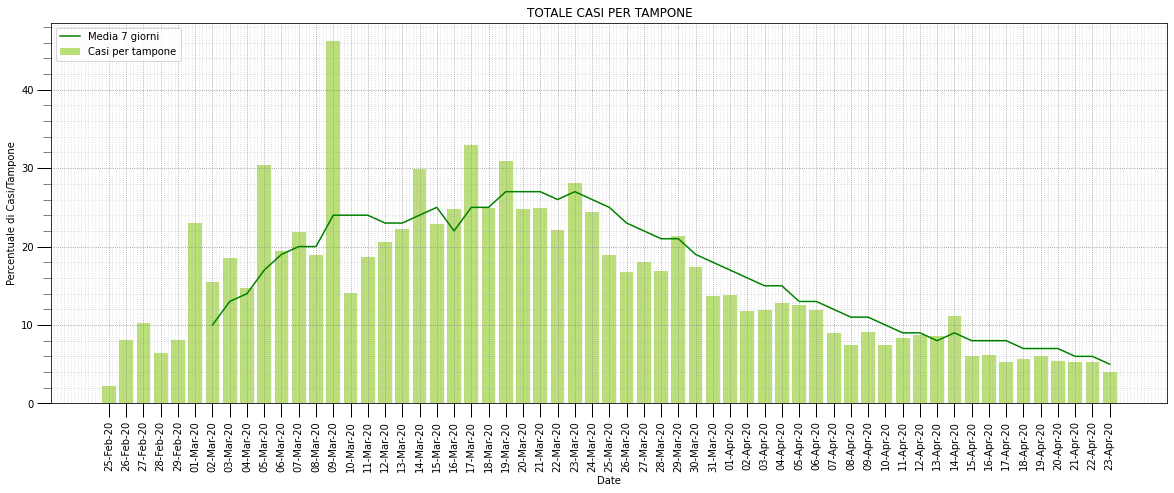

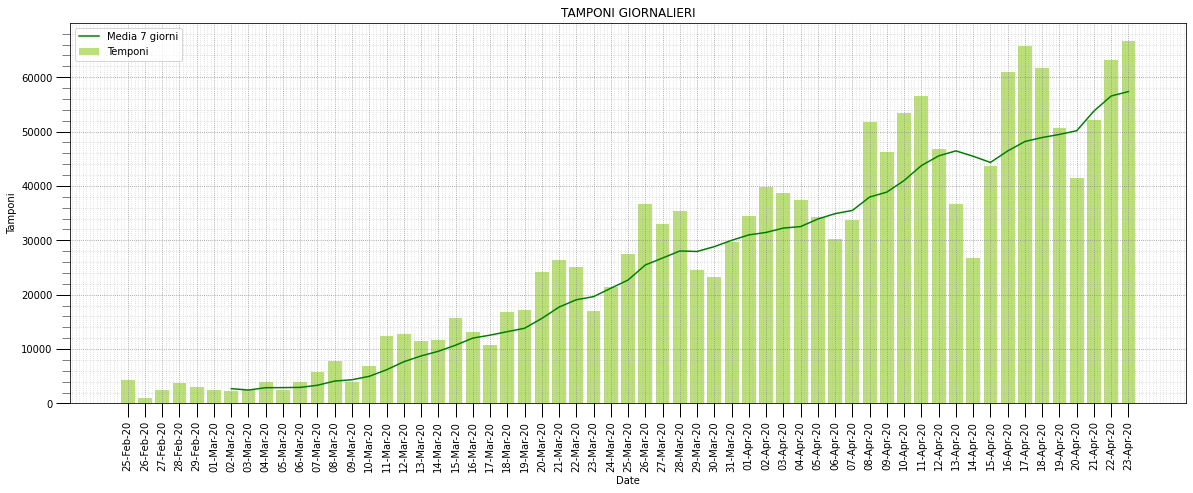

In [119]:
fig, ax = plt.subplots()

casi_tampone = incremental_data['totale_casi']/incremental_data['tamponi']

media_7_giorni =casi_tampone.rolling(7).mean().round(2)


plt.plot(incremental_data['data'], media_7_giorni*100, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], (incremental_data['totale_casi']/incremental_data['tamponi'])*100, label='Casi per tampone', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TOTALE CASI PER TAMPONE")
ax.set_ylabel('Percentuale di Casi/Tampone')
beautify_graph(ax)

fig, ax = plt.subplots()
tamponi = incremental_data['tamponi']

media_7_giorni =tamponi.rolling(7).mean().round(2)

plt.plot(incremental_data['data'], media_7_giorni, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], tamponi, label='Temponi', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TAMPONI GIORNALIERI")
ax.set_ylabel('Tamponi')
beautify_graph(ax)

#### I dati degli ultimi 5 giorni

In [120]:

show_table(incremental_data.rename(columns=NAME_LABELS),5).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
19-Apr-20         3047             486     2128       433          -72   
20-Apr-20         2256             -20     1822       454         -189   
21-Apr-20         2729            -528     2723       534         -874   
22-Apr-20         3370             -10     2943       437         -416   
23-Apr-20         2646            -851     3033       464        -1051   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
19-Apr-20          26           -98            558    50708  
20-Apr-20        -127           -62            169    41483  
21-Apr-20        -772          -102            346    52126  
22-Apr-20        -329           -87            406    63101  
23-Apr-20        -934          -117            200    66658

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

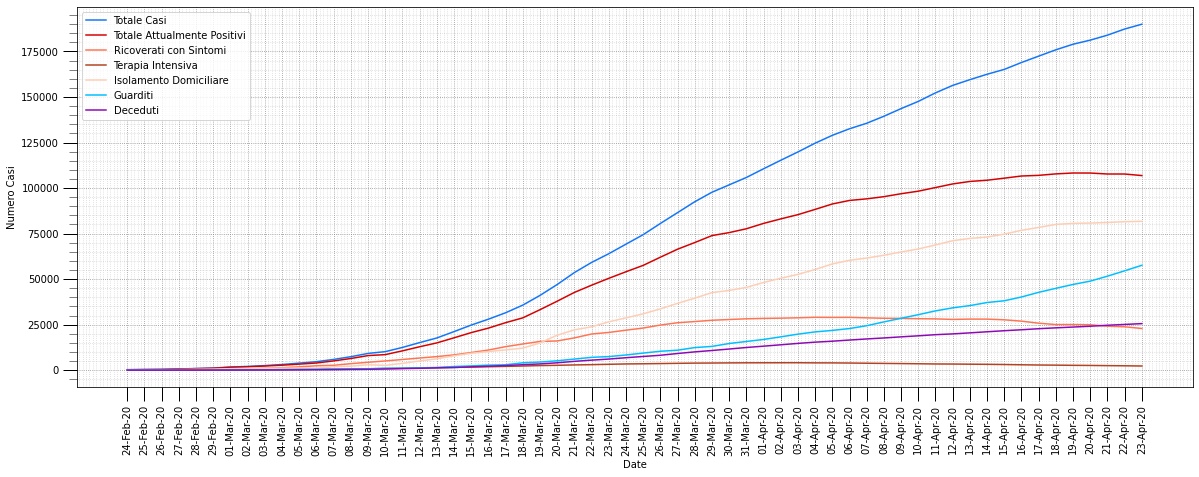

In [121]:
fig, ax = plt.subplots()

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

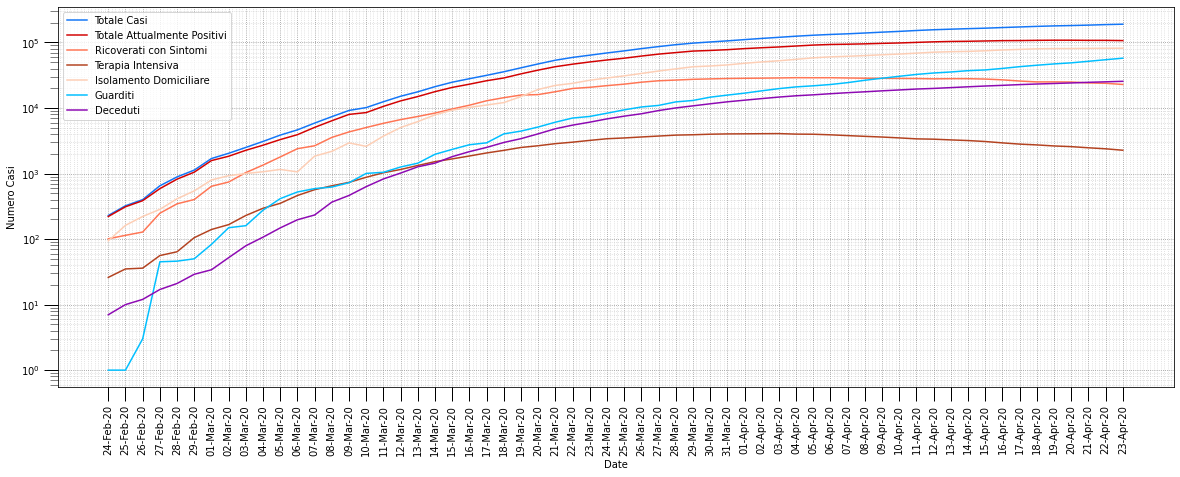

In [122]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)


#### I dati degli ultimi 7 giorni

In [123]:
show_table(national_trend.rename(columns = NAME_LABELS),7).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
17-Apr-20       172434         106962    42727     22745        28598   
18-Apr-20       175925         107771    44927     23227        27740   
19-Apr-20       178972         108257    47055     23660        27668   
20-Apr-20       181228         108237    48877     24114        27479   
21-Apr-20       183957         107709    51600     24648        26605   
22-Apr-20       187327         107699    54543     25085        26189   
23-Apr-20       189973         106848    57576     25549        25138   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
17-Apr-20       25786          2812          78364  1244108  
18-Apr-20       25007          2733          80031  1305833  
19-Apr-20       25033          2635          80589  1356541  
20-Apr-20       24906          2573          80758  1398024  
21-Apr-20       24134          2471          81104  1450150  
22-Apr-20       23805          2384          81510  1513251  
23-Apr-20       22871          2267          81710  1579909

### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [124]:
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/national_trend[c].shift(1)*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [125]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
17-Apr-20         2.07          -70.14           0.33     6.38      2.59   
18-Apr-20         2.02          127.89           0.76     5.15      2.12   
19-Apr-20         1.73          -39.93           0.45     4.74      1.86   
20-Apr-20         1.26         -104.12          -0.02     3.87      1.92   
21-Apr-20         1.51         2540.00          -0.49     5.57      2.21   
22-Apr-20         1.83          -98.11          -0.01     5.70      1.77   
23-Apr-20         1.41         8410.00          -0.79     5.56      1.85   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
17-Apr-20        -4.13       -4.12         -4.22           2.07     5.58  
18-Apr-20        -3.00       -3.02         -2.81           2.13     4.96  
19-Apr-20        -0.26        0.10         -3.59           0.70     3.88  
20-Apr-20        -0.68       -0.51         -2.35           0.21     3.06  
21-Apr-20        -3.18       -3.10         -3.96           0.43     3.73  
22-Apr-20        -1.56       -1.36         -3.52           0.50     4.35  
23-Apr-20        -4.01       -3.92         -4.91           0.25     4.40

In [126]:
a ="""
fig, ax = plt.subplots()

plot =['totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', ]
labels = ['Totale attualmente positivi', 'Guariti', 'Morti', ]
colors = [COL_ATTUALMENTE_POSITIVI, COL_GUARITI, COL_DECEDUTI]
for i in range(0,len(plot)):
    plt.plot(growth_rates['data'], growth_rates[plot[i]], color=colors[i], label=labels[i])
ax.set_ylim(0,60)
ax.set_xticklabels(growth_rates['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

fig, ax = plt.subplots()

plot =['ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare']
labels = ['Ricoverati lievi', 'Terapia intensiva', 'In isolamento domiciliare']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
for i in range(0,len(plot)):
    plt.plot(growth_rates['data'], growth_rates[plot[i]], color=colors[i], label=labels[i])
ay.set_ylim(-10,40)
ax.set_xticklabels(growth_rates['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

"""

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [127]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/avg_trend['attualmente_positivi'].shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [128]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
19-Apr-20       178972   1.73           1.95                 108257   0.45   
20-Apr-20       181228   1.26           1.84                 108237  -0.02   
21-Apr-20       183957   1.51           1.79                 107709  -0.49   
22-Apr-20       187327   1.83           1.82                 107699  -0.01   
23-Apr-20       189973   1.41           1.69                 106848  -0.79   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
19-Apr-20           0.82    47055   4.74           4.67       433   1.86   
20-Apr-20           0.63    48877   3.87           4.71       454   1.92   
21-Apr-20           0.46    51600   5.57           4.82       534   2.21   
22-Apr-20           0.31    54543   5.70           5.26       437   1.77   
23-Apr-20           0.03    57576   5.56           5.28       464   1.85   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
19-Apr-20           2.50    50708   3.88           4.31  
20-Apr-20           2.37    41483   3.06           4.22  
21-Apr-20           2.27    52126   3.73           4.39  
22-Apr-20           2.13    63101   4.35           4.43  
23-Apr-20           2.05    66658   4.40           4.28

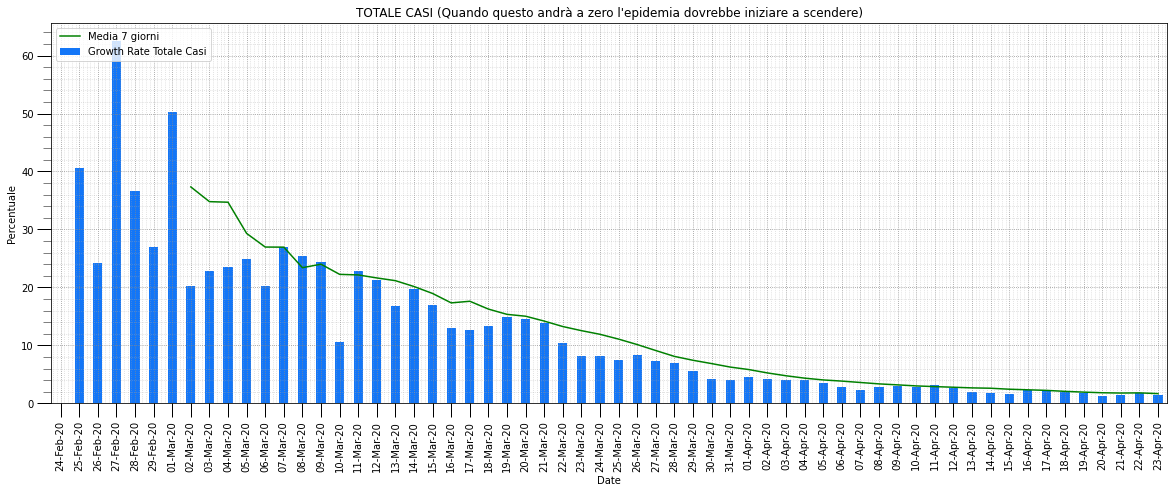

In [129]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

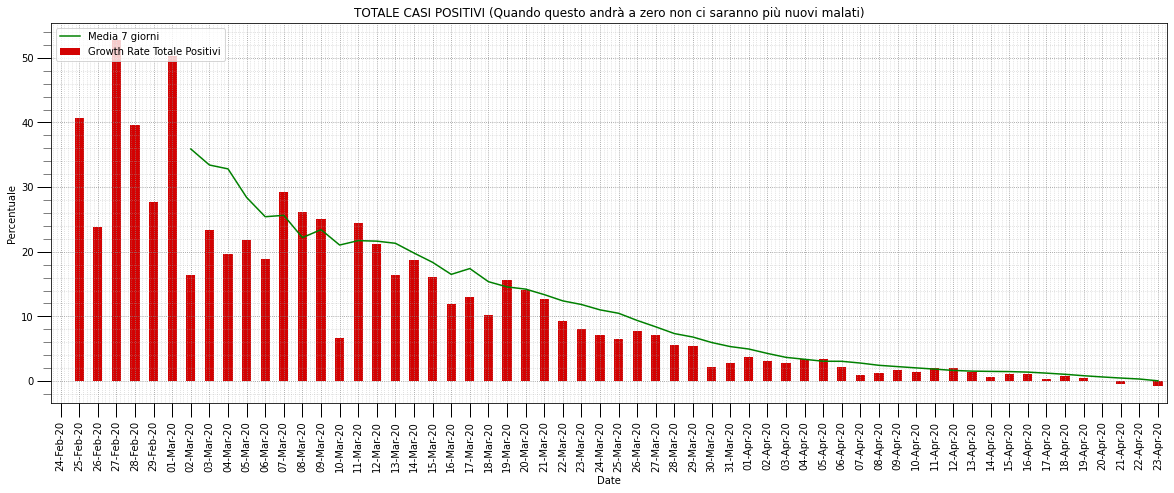

In [130]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


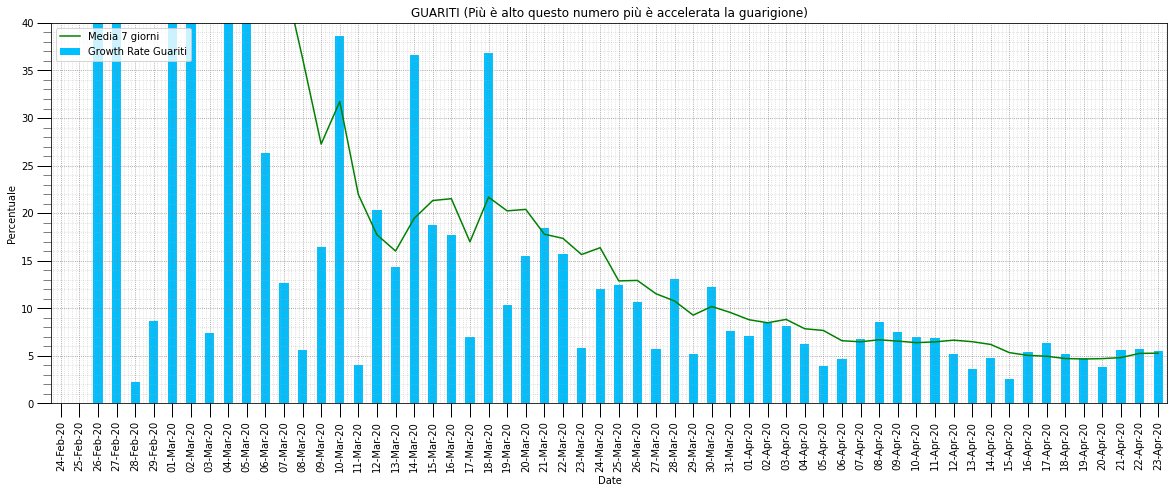

In [131]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

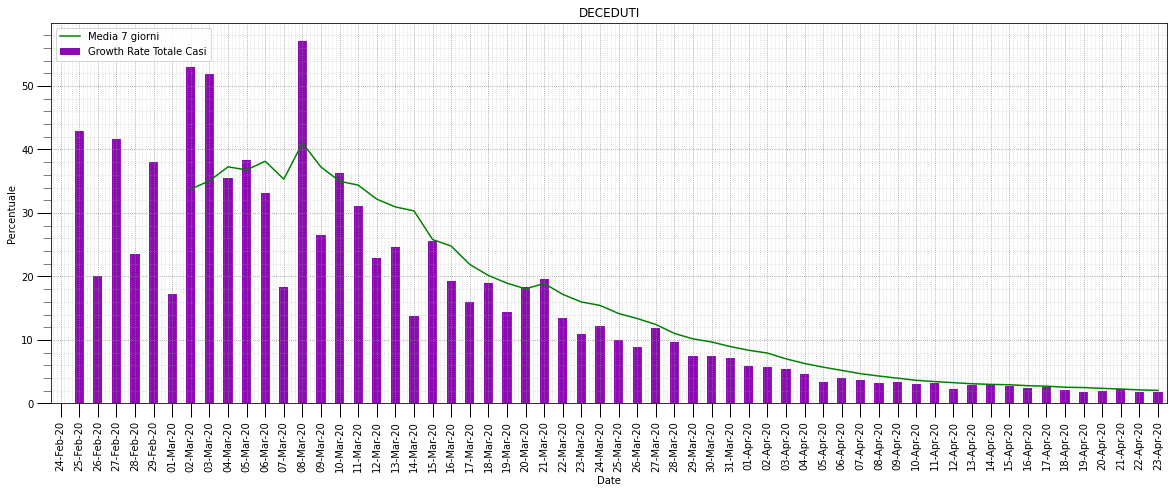

In [132]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 1 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di 1 indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a 1 indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno). Una fattore uguale a zero significa che è stabile. 

In [133]:
max_tamponi = incremental_data['tamponi'].max()


In [134]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / abs(gf['diff'].shift(1)))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf_15'] = gf['gr'].rolling(15).mean().round(3)


gf['tamponi'] =national_trend['tamponi']
gf['diff_tamp'] =national_trend['tamponi']-national_trend['tamponi'].shift(1)
gf['totale_casi'].shift(1) * max_tamponi /(national_trend['tamponi'].shift(1) -national_trend['tamponi'].shift(2))
gf['gr_tamp'] = ((gf['diff_tamp'] / abs(gf['diff_tamp'].shift(1)))).round(3)
gf['avg_gf_tamp'] = gf['gr_tamp'].rolling(7).mean().round(3)
gf['avg_gf_tamp_15'] = gf['gr_tamp'].rolling(15).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)

gf['gr_att_pos'] = ((gf['diff_att_pos'] / abs(gf['diff_att_pos'].shift(1)))).round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)
gf['avg_att_pos_15'] = gf['gr_att_pos'].rolling(15).mean().round(3)


show_table(gf, 7)\
    .drop('diff', axis=1)\
    .drop('diff_att_pos', axis=1)\
    .drop('diff_tamp', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR NUOVI', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'avg_gf_15': 'MEDIA 15GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'avg_att_pos_15': 'MEDIA 15GG',
        'gr_tamp': 'GROWTH FACTOR TAMPONI',
        'avg_gf_tamp_15': 'MEDIA 15GG',
        'avg_gf_tamp': 'MEDIA 7GG'
       })


CASI TOTALI  GROWTH FACTOR NUOVI  MEDIA 7GG  MEDIA 15GG  TAMPONI  \
                                                                              
17-Apr-20       172434                0.923      1.002       0.995  1244108   
18-Apr-20       175925                0.999      0.975       0.996  1305833   
19-Apr-20       178972                0.873      0.975       0.984  1356541   
20-Apr-20       181228                0.740      0.971       0.973  1398024   
21-Apr-20       183957                1.210      1.009       0.999  1450150   
22-Apr-20       187327                1.235      1.057       1.025  1513251   
23-Apr-20       189973                0.785      0.966       0.993  1579909   

           GROWTH FACTOR TAMPONI  MEDIA 7GG  MEDIA 15GG  TOT. POSITIVI  \
                                                                         
17-Apr-20                  1.077      1.072       1.063         106962   
18-Apr-20                  0.939      1.055       1.061         107771   
19-Apr-20                  0.822      1.054       1.051         108257   
20-Apr-20                  0.818      1.059       1.044         108237   
21-Apr-20                  1.257      1.134       1.069         107709   
22-Apr-20                  1.211      1.074       1.076         107699   
23-Apr-20                  1.056      1.026       1.044         106848   

           GROWTH FACTOR ATT. POS.  MEDIA 7GG  MEDIA 15GG  
                                                           
17-Apr-20                    0.299      0.947       0.968  
18-Apr-20                    2.279      1.068       1.057  
19-Apr-20                    0.601      1.012       1.015  
20-Apr-20                   -0.041      0.908       0.943  
21-Apr-20                  -26.400     -2.934      -0.860  
22-Apr-20                   -0.019     -3.175      -0.892  
23-Apr-20                  -85.100    -15.483      -6.656

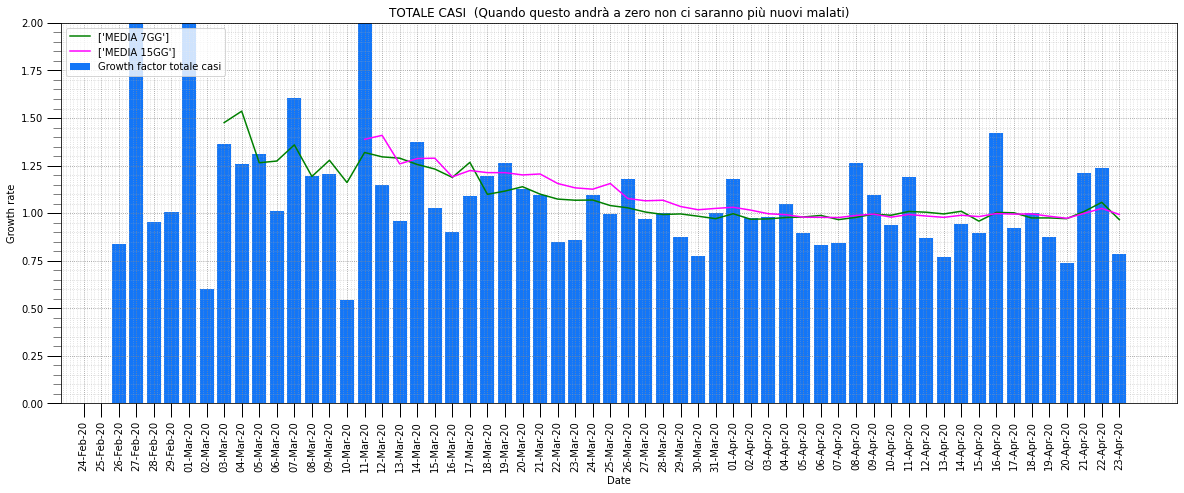

In [135]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor totale casi', color=COL_TOTALE_CASI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


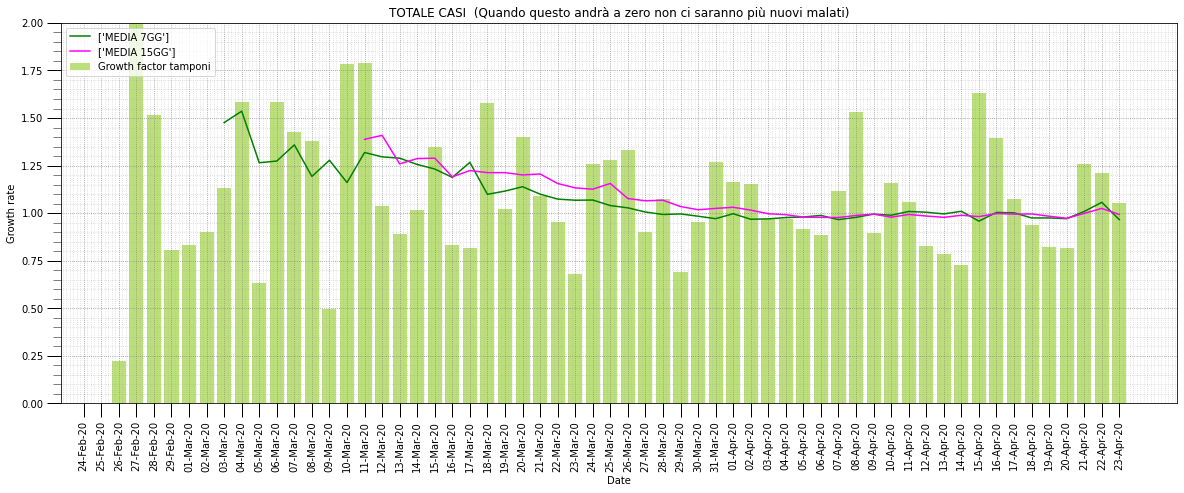

In [136]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_tamp'], label='Growth factor tamponi', color=COL_TAMPONI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


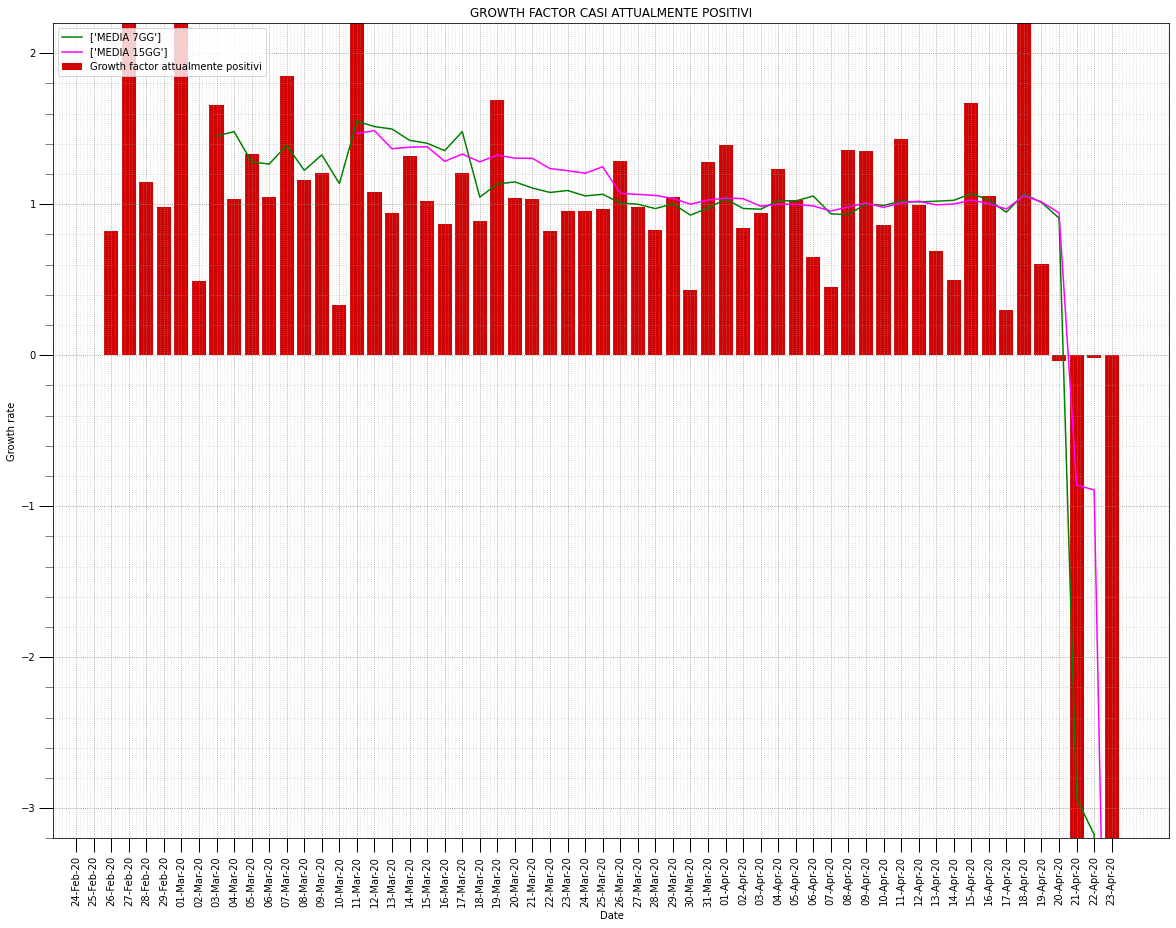

In [137]:
plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_att_pos'], label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ax.plot(gf['data'], gf['avg_att_pos'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_att_pos_15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-3.2,2.2)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

In [138]:
plt.rcParams['figure.figsize'] = [20, 7]

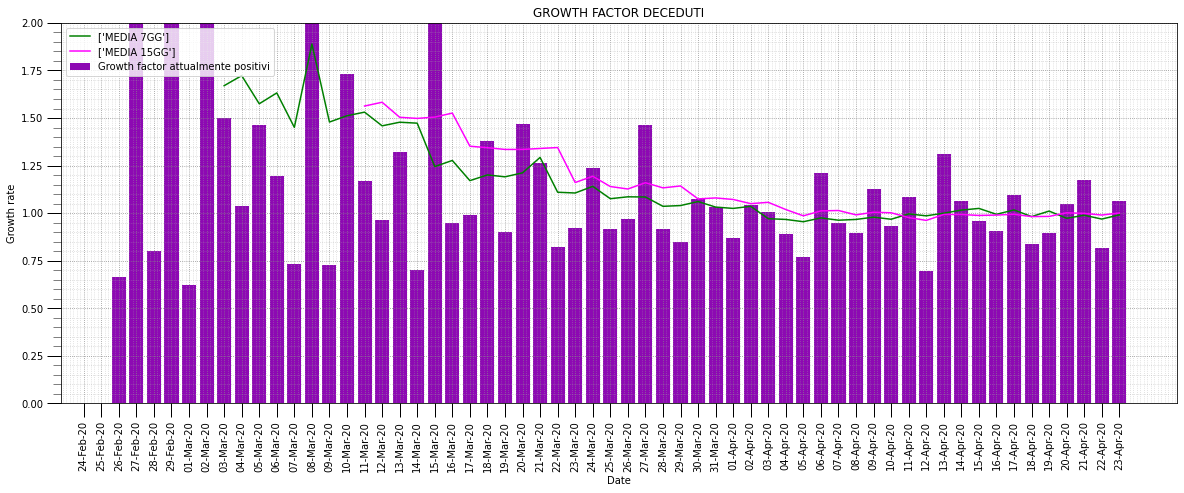

In [139]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_DECEDUTI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


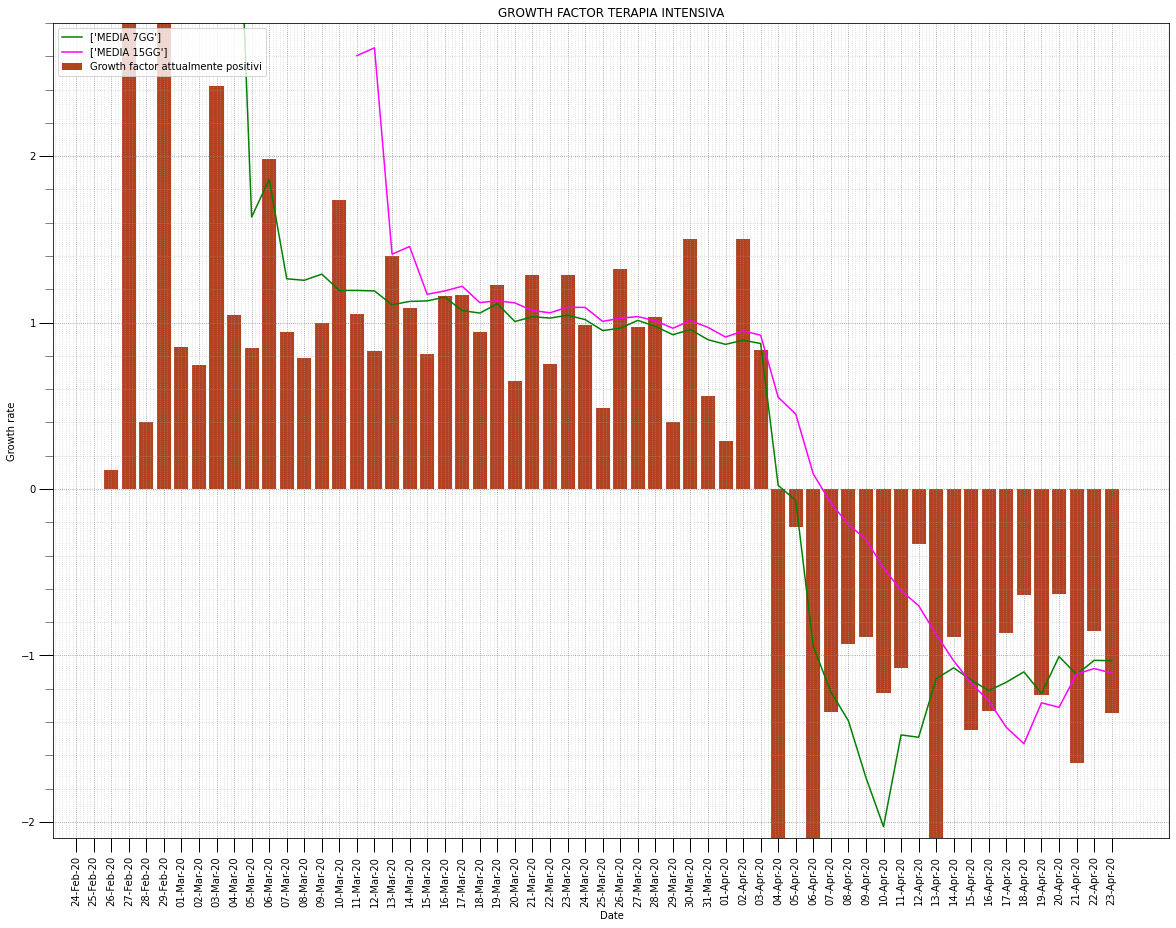

In [140]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / abs(gf['diff'].shift(1))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_TERAPIA_INTENSIVA)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-2.1,2.8)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)
plt.rcParams['figure.figsize'] = [20, 7]

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [141]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [142]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
17-Apr-20      -31.69           -3.55                   45.41    73.38   
18-Apr-20      -22.31           -2.26                   47.75    63.02   
19-Apr-20        0.85           -3.22                   18.31    69.84   
20-Apr-20       -5.63           -2.75                    7.49    80.76   
21-Apr-20      -28.29           -3.74                   12.68    99.78   
22-Apr-20       -9.76           -2.58                   12.05    87.33   
23-Apr-20      -35.30           -4.42                    7.56   114.63   

           DECEDUTI  
                     
17-Apr-20     16.46  
18-Apr-20     13.81  
19-Apr-20     14.21  
20-Apr-20     20.12  
21-Apr-20     19.57  
22-Apr-20     12.97  
23-Apr-20     17.54

**Nuove Percentuali dell'ultimo giorno non tiene conto dei valori negativi**

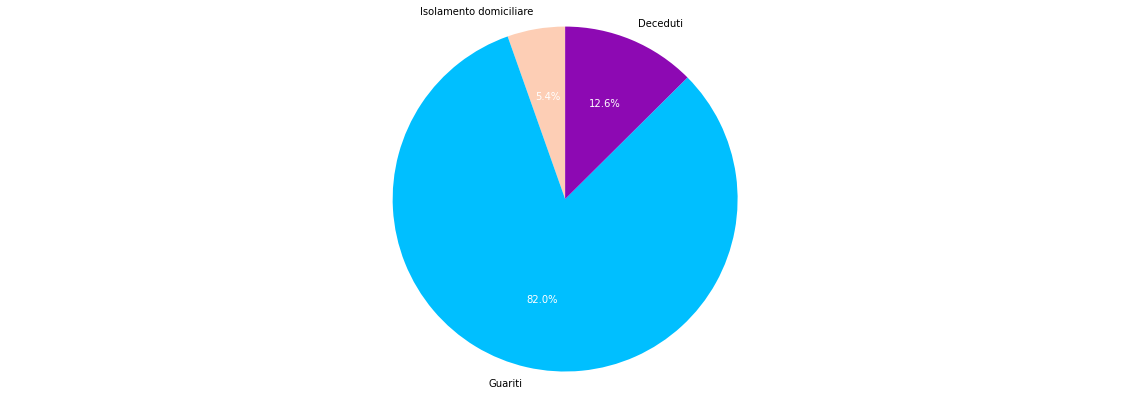

In [143]:
# Data to plot
last_info = incremental_data[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])

all_colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
all_labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
values = [v1, v2, v3, v4, v5]

colors = []
labels = []
sizes = []

for i in range(len(all_labels)):
    if values[i]>0:
        sizes.append(values[i])
        labels.append(all_labels[i])
        colors.append(all_colors[i])
        
fig1, ax1 = plt.subplots()
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')
plt.show()


In [144]:
percents_in_period.tail(5)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
19-Apr-20  19-Apr-20                    0.85              -3.22   
20-Apr-20  20-Apr-20                   -5.63              -2.75   
21-Apr-20  21-Apr-20                  -28.29              -3.74   
22-Apr-20  22-Apr-20                   -9.76              -2.58   
23-Apr-20  23-Apr-20                  -35.30              -4.42   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
19-Apr-20                   18.31            69.84     14.21   -39.93  
20-Apr-20                    7.49            80.76     20.12  -104.12  
21-Apr-20                   12.68            99.78     19.57  2540.00  
22-Apr-20                   12.05            87.33     12.97   -98.11  
23-Apr-20                    7.56           114.63     17.54  8410.00

In [145]:
a="""plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()

plot = ['isolamento_domiciliare','dimessi_guariti','deceduti','ricoverati_con_sintomi','terapia_intensiva']
colors = [COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI,COL_RICOVERATI, COL_TERAPIA_INTENSIVA ]
labels = ['Isolamento Domiciliare','Guariti','Deceduti','Ricoverati con sintomi','Terapia Intensiva']

for i in range(len(plot)):
    plt.bar(percents_in_period['data'], percents_in_period[plot[i]], color=colors[i],label=labels[i])

ax.set_ylim(-20,100)
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_title("PERCENTUALE GIORNALIERA")
ax.set_ylabel('Percentuale')
beautify_graph(ax)
"""

**Le percentuali dall'inizio dell'epidemia**

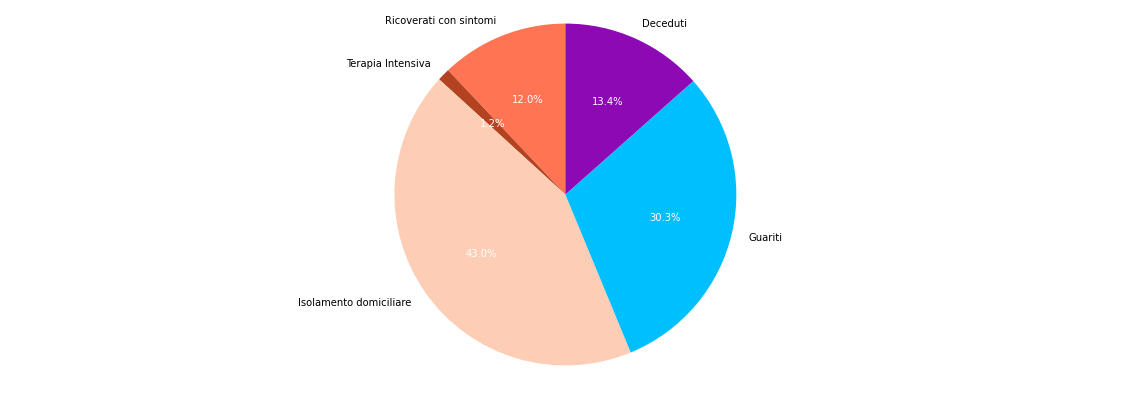

In [146]:
# Data to plot
last_info = national_trend[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])
labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
sizes = [v1, v2, v3, v4, v5]
fig1, ax1 = plt.subplots()
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')

plt.show()


In [147]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [148]:
percents_in_period.tail(5).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
19-Apr-20       13.99            1.47                   45.03    26.29   
20-Apr-20       13.74            1.42                   44.56    26.97   
21-Apr-20       13.12            1.34                   44.09    28.05   
22-Apr-20       12.71            1.27                   43.51    29.12   
23-Apr-20       12.04            1.19                   43.01    30.31   

           DECEDUTI  
                     
19-Apr-20     13.22  
20-Apr-20     13.31  
21-Apr-20     13.40  
22-Apr-20     13.39  
23-Apr-20     13.45

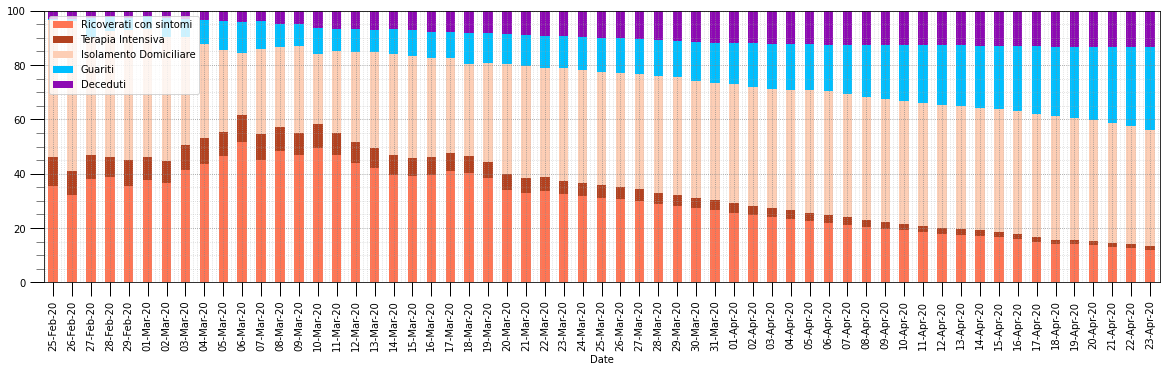

In [149]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 5]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [150]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [151]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [152]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [153]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [154]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
23-Apr-20     2785         356          2435      1069      4238   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
23-Apr-20           23723                   2858   6054     7049      70165

In [155]:
regional_datas['totale_casi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
23-Apr-20    5952     284     23140    3839      1254     2926     8780   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
23-Apr-20         3727    1362           1096   16881

### Nuovi Casi Per Regione

In [156]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [157]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
17-Apr-20       97           1            29       -18        64   
18-Apr-20       44           2            29        20        37   
19-Apr-20       34           3            55        24        41   
20-Apr-20       91           0            14         3        45   
21-Apr-20       55           8            16         9        61   
22-Apr-20       66           4             6        13        50   
23-Apr-20       52           2            19         9        53   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
17-Apr-20             348                     59    144      149       1041  
18-Apr-20             350                     56    144      113       1246  
19-Apr-20             376                     14     87      227        855  
20-Apr-20             307                     30     60      141        735  
21-Apr-20             225                     17     80       95        960  
22-Apr-20             342                     25     80      154       1161  
23-Apr-20             289                     41     79      131       1073

In [158]:

incremental_data_regional.iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
17-Apr-20      86       6       695      69        14       46      167   
18-Apr-20      53       0       661      82        20       47      127   
19-Apr-20      48      10       593     120        17       45      135   
20-Apr-20      57       2       292      38        13       42      135   
21-Apr-20      51       1       606      55         8       76       96   
22-Apr-20      47       2       784     108        11       48       97   
23-Apr-20      28       0       401     109         7       43       80   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
17-Apr-20           82       8             22     384  
18-Apr-20           55       7             80     318  
19-Apr-20          101       4             15     243  
20-Apr-20           58       1              0     192  
21-Apr-20           24       4              5     277  
22-Apr-20           32       4              2     334  
23-Apr-20           81       5              1     143

### Totale Attualmente Positivi per Regione

In [159]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
23-Apr-20     2100         229          1494       823      2978   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
23-Apr-20           12845                   1135   4486     3466      33873

In [160]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
23-Apr-20    3230     198     15152    2936       817     2301     6171   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
23-Apr-20         1871     355            463    9925

### Nuovi Positivi per Regione

In [161]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
17-Apr-20       92          -7           -11       -28       -91   
18-Apr-20       29          -4           -26        13        18   
19-Apr-20       16         -15            10        12       -23   
20-Apr-20       75          -5           -26       -16        -3   
21-Apr-20        5           3            -4        -9       -73   
22-Apr-20       41         -13           -24         2        52   
23-Apr-20       -8          -3           -18         2       -20   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
17-Apr-20             -78                     98     70       22        344  
18-Apr-20              -1                    -25     68      -47        761  
19-Apr-20             -32                    -66     39       78        302  
20-Apr-20             -30                   -147     44        6         90  
21-Apr-20            -278                    132     37      -33       -609  
22-Apr-20            -160                    -14     61       13        264  
23-Apr-20            -239                   -173     23      -10       -369

In [162]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
17-Apr-20      33       5       215      31         7       31      -30   
18-Apr-20      15       1       225      38         9       32     -113   
19-Apr-20      10       6       247      92       -17       31       26   
20-Apr-20      30      -2        87      24       -10        8       72   
21-Apr-20       6       0       254       2       -17       49       54   
22-Apr-20      12      -8       311      62        -4       28     -455   
23-Apr-20       0      -7        30      62       -16       14        4   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
17-Apr-20          -97     -42            -27    -182  
18-Apr-20           -5     -63             58    -174  
19-Apr-20          -14       5             13    -234  
20-Apr-20          -42     -12            -14    -149  
21-Apr-20          -20     -17            -26      16  
22-Apr-20          -35     -36            -21     -86  
23-Apr-20           -3     -16            -38     -66

### Terapia intensiva

In [163]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
17-Apr-20       43           9            32         7        76   
18-Apr-20       41           8            28         7        76   
19-Apr-20       40           8            23         6        61   
20-Apr-20       38           7            19         7        61   
21-Apr-20       35           7            20         7        58   
22-Apr-20       35           7            19         7        53   
23-Apr-20       31           7            17         7        47   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
17-Apr-20             309                     23    187      105        971  
18-Apr-20             296                     27    186      105        947  
19-Apr-20             289                     25    185      101        922  
20-Apr-20             283                     22    185      102        901  
21-Apr-20             282                     21    184       94        851  
22-Apr-20             282                     20    187       92        817  
23-Apr-20             266                     18    186       91        790

In [164]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
17-Apr-20      94       4       333      62        23       46      207   
18-Apr-20      88       4       323      60        23       42      198   
19-Apr-20      86       4       305      60        22       41      192   
20-Apr-20      80       2       301      66        21       39      182   
21-Apr-20      78       2       293      65        21       37      171   
22-Apr-20      76       2       273      60        20       35      174   
23-Apr-20      71       1       261      55        20       34      168   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
17-Apr-20           44      31              9     197  
18-Apr-20           42      32             10     190  
19-Apr-20           41      30             10     184  
20-Apr-20           40      29              8     180  
21-Apr-20           38      22              8     177  
22-Apr-20           34      20              8     163  
23-Apr-20           29      19              9     140

### Grafici Regionali

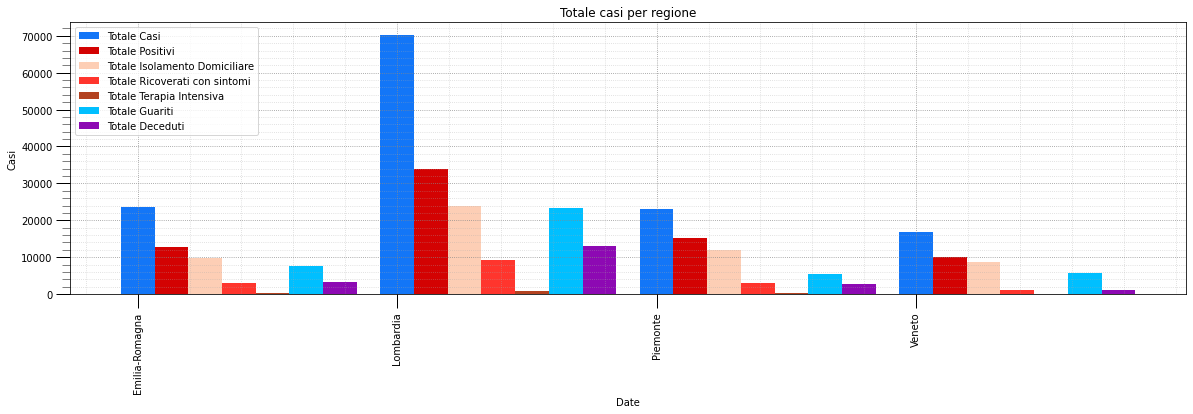

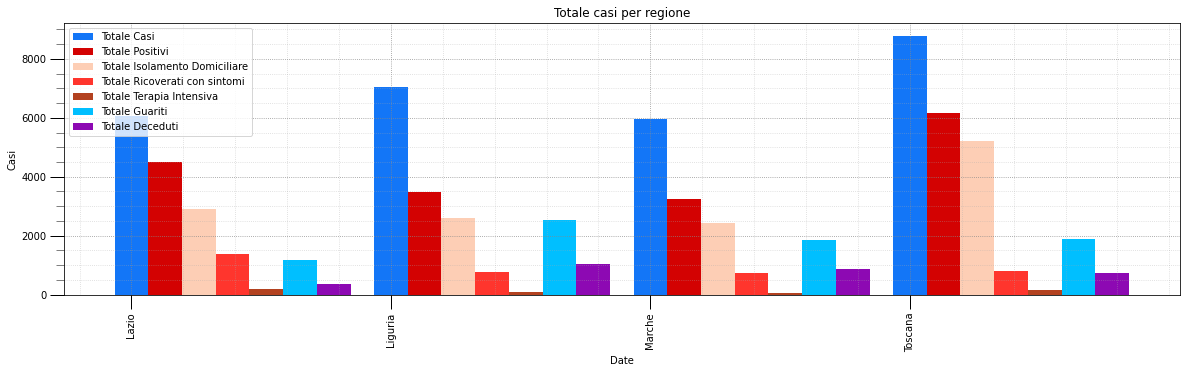

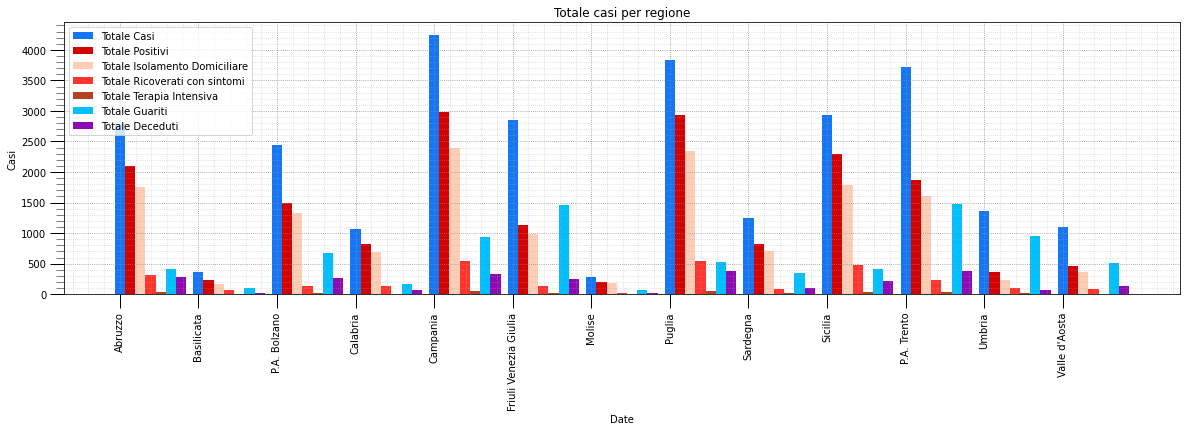

In [165]:
COL_TAMPONI= '#bce079'

high_level_regions = ['Lombardia','Veneto','Emilia-Romagna','Piemonte']

mid_level_regions = ['Toscana','Lazio','Liguria','Marche']

def high_level(df):
    d = df.copy()
    for c in df.columns:
        if c not in high_level_regions:
            d = d.drop(c, axis=1)
    return d

def mid_level(df):
    d = df.copy()
    for c in df.columns:
        if c not in mid_level_regions:
            d = d.drop(c, axis=1)
    return d

def low_level(df):
    d = df.copy()
    for c in high_level_regions + mid_level_regions:
        d = d.drop(c, axis=1)
    return d


levels= [high_level, mid_level, low_level]

for l in levels:
    fig, ax = plt.subplots()

    w=0.13

    d = l(regional_datas['totale_casi'])[-1:]

    x_label=[x for x in d.columns]
    x=np.arange(len(x_label))

    d = l(regional_datas['totale_casi'])[-1:]
    y=d.values[0]
    plt.bar(x_label, y, width=w,color=COL_TOTALE_CASI, label='Totale Casi')

    d = l(regional_datas['totale_attualmente_positivi'])[-1:]
    y=d.values[0]
    plt.bar(x+w, y, width=w, color=COL_ATTUALMENTE_POSITIVI, label='Totale Positivi')

    d = l(regional_datas['isolamento_domiciliare'])[-1:]
    y=d.values[0]
    plt.bar(x+2*w, y, width=w, color=COL_ISOLAMENTO_DOMICILIARE, label='Totale Isolamento Domiciliare')

    d = l(regional_datas['ricoverati_con_sintomi'])[-1:]
    y=d.values[0]
    plt.bar(x+3*w, y, width=w, color=COL_TOT_RICOVERATI, label='Totale Ricoverati con sintomi')

    d = l(regional_datas['terapia_intensiva'])[-1:]
    y=d.values[0]
    plt.bar(x+4*w, y, width=w, color=COL_TERAPIA_INTENSIVA, label='Totale Terapia Intensiva')

    d = l(regional_datas['dimessi_guariti'])[-1:]
    y=d.values[0]
    plt.bar(x+5*w, y, width=w, color=COL_GUARITI, label='Totale Guariti')

    d = l(regional_datas['deceduti'])[-1:]
    y=d.values[0]
    plt.bar(x+6*w, y, width=w, color=COL_DECEDUTI, label='Totale Deceduti')


    ax.set_title("Totale casi per regione")
    ax.set_ylabel('Casi')
    ax.set_xticklabels(x_label, rotation=90)
    beautify_graph(ax)


## Andamento per regione

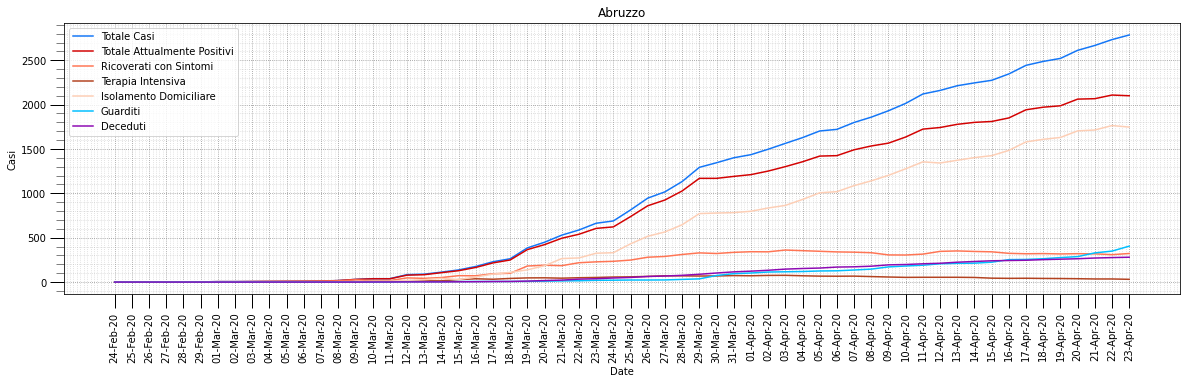

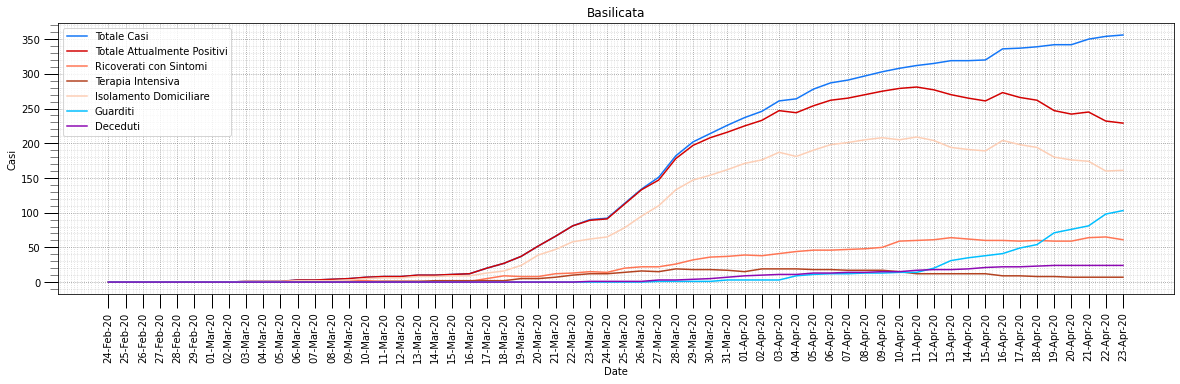

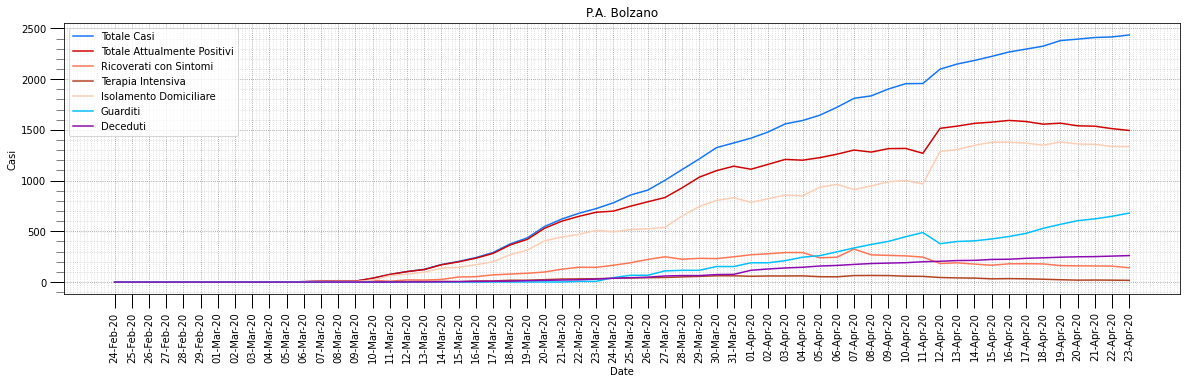

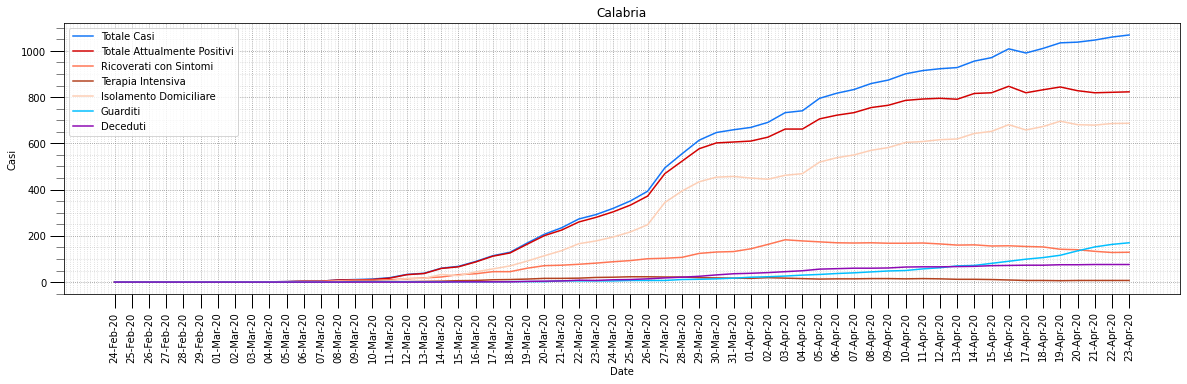

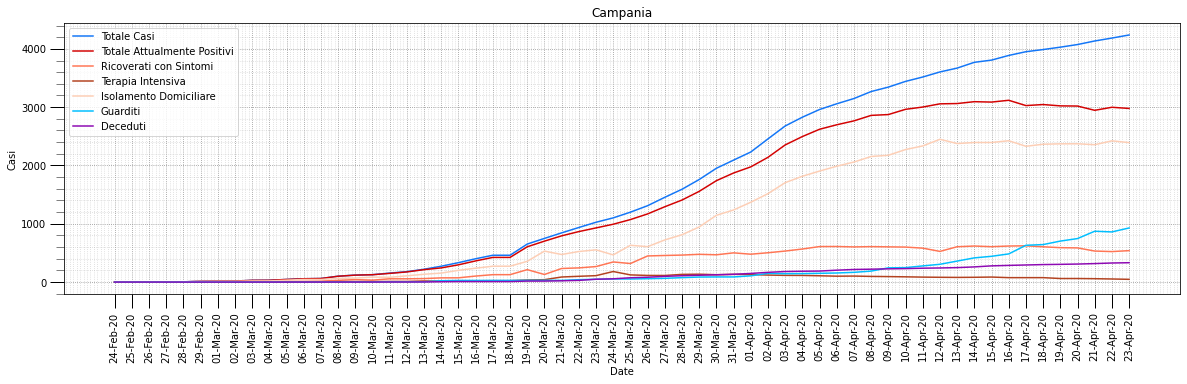

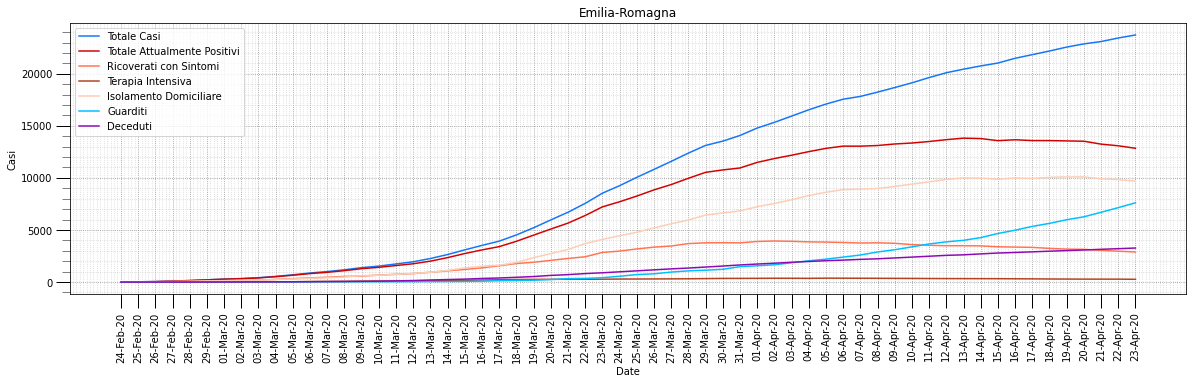

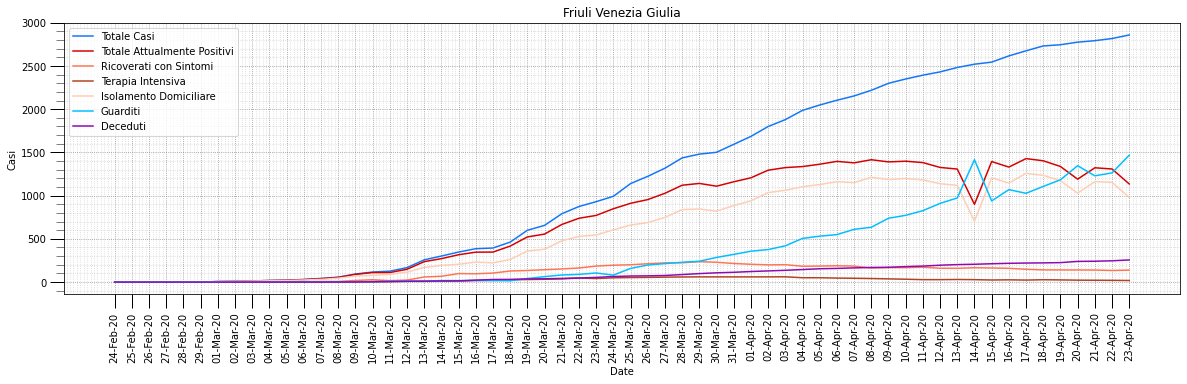

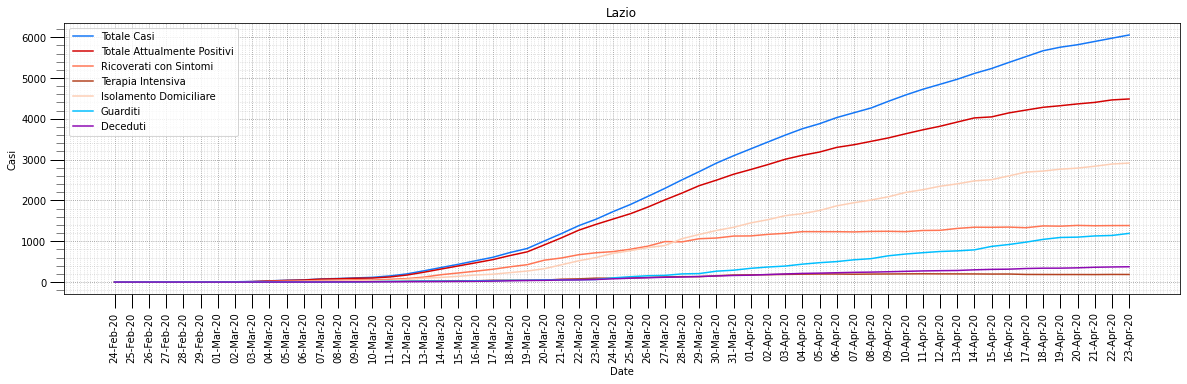

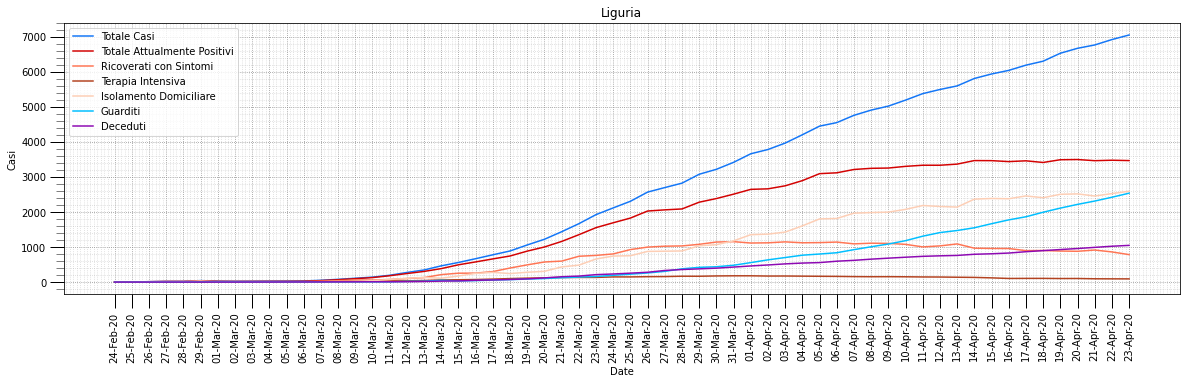

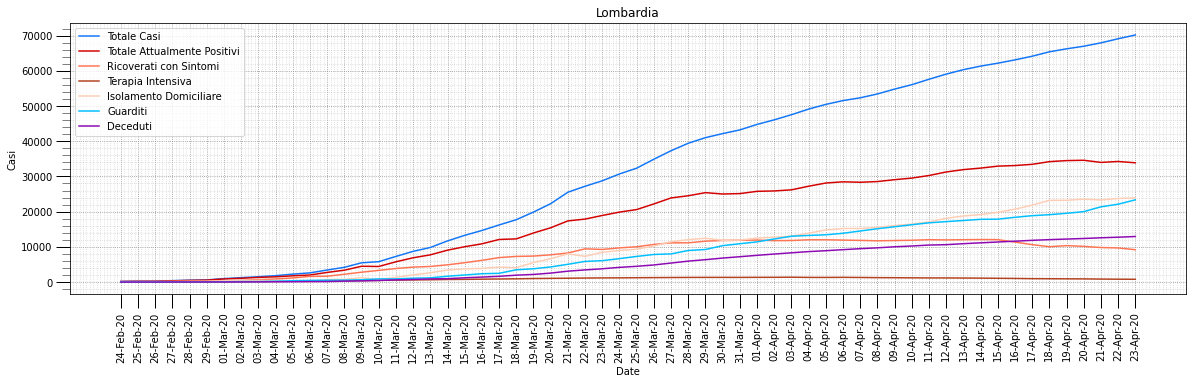

In [166]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

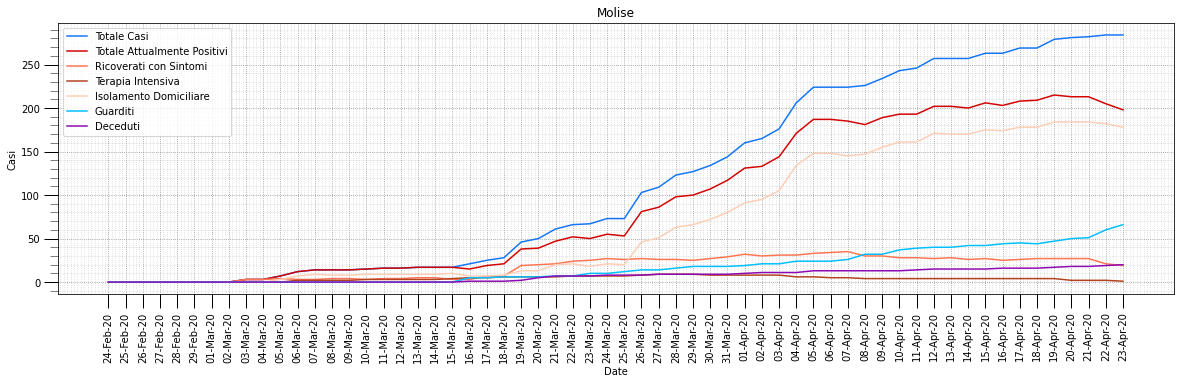

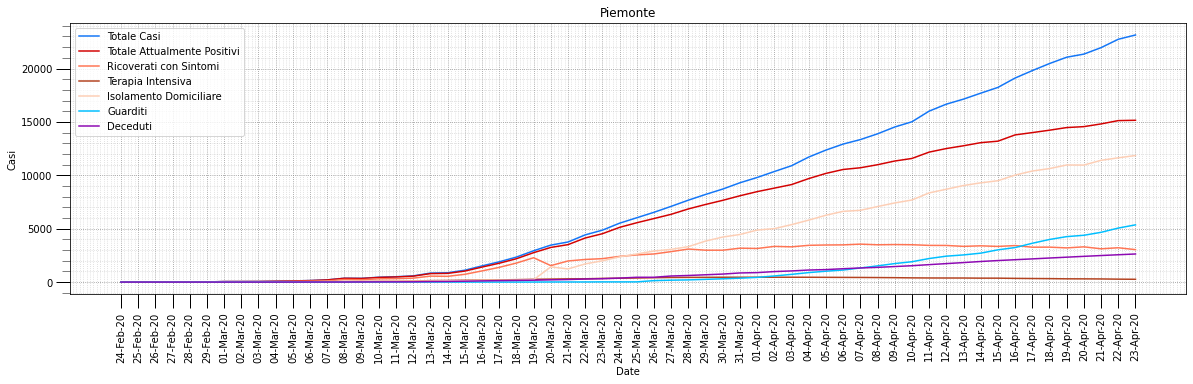

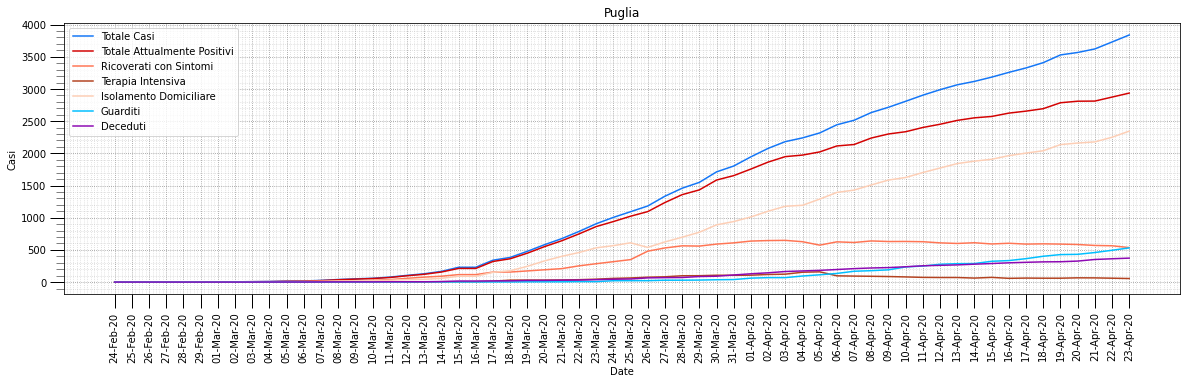

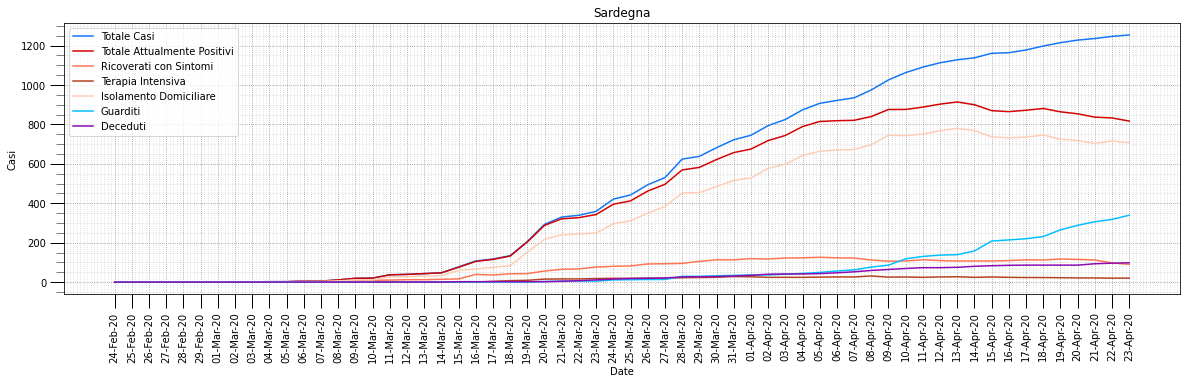

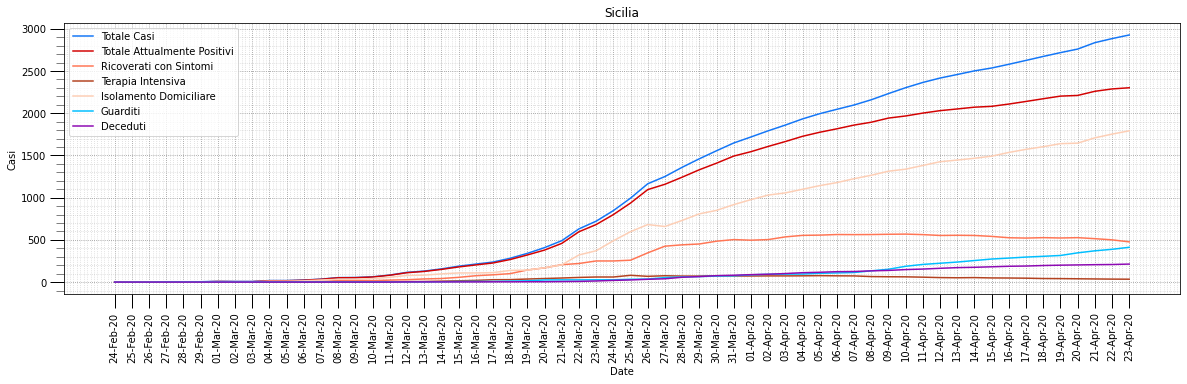

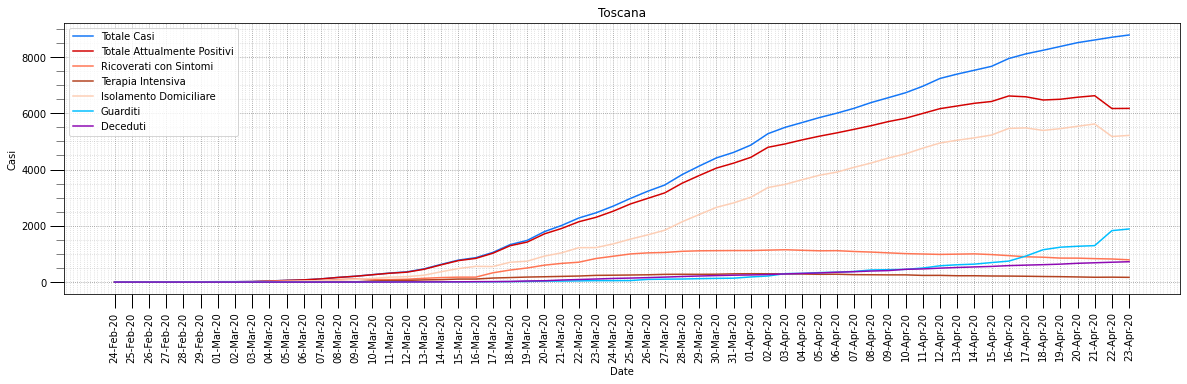

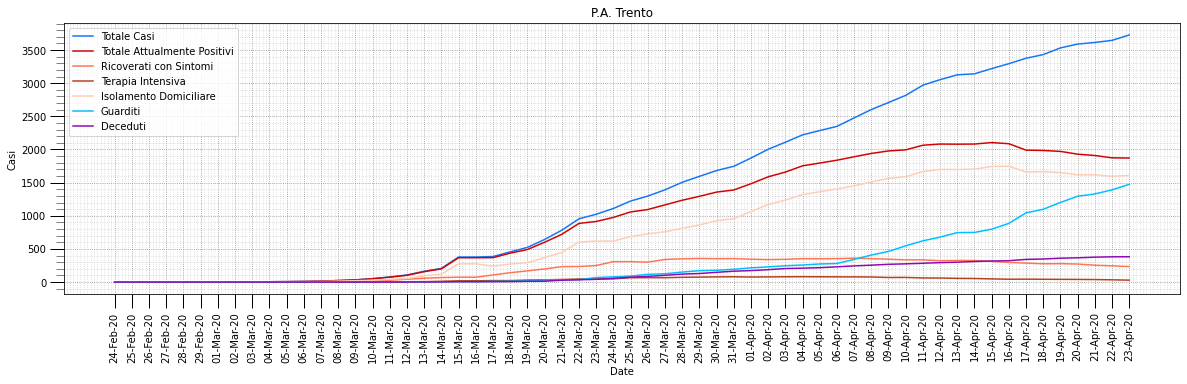

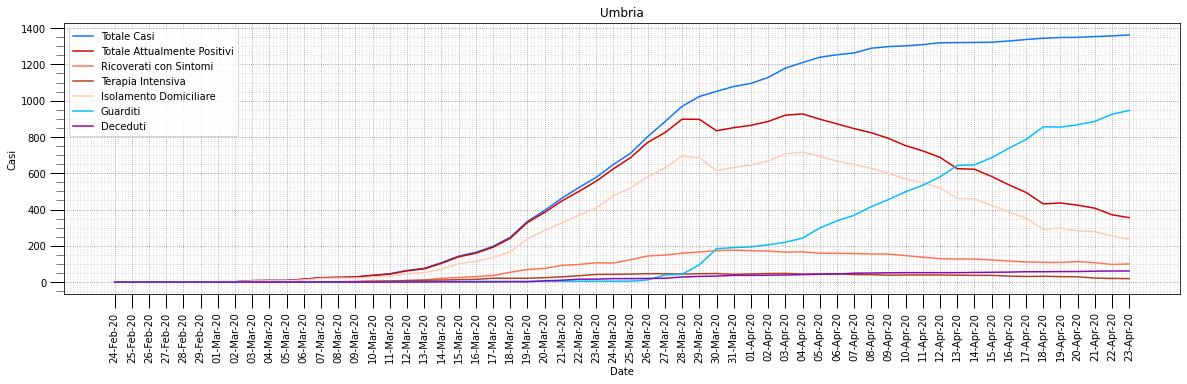

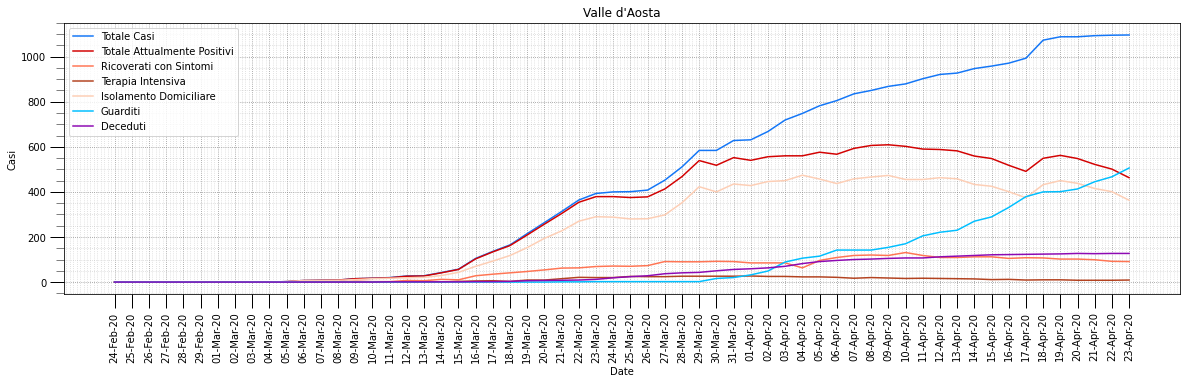

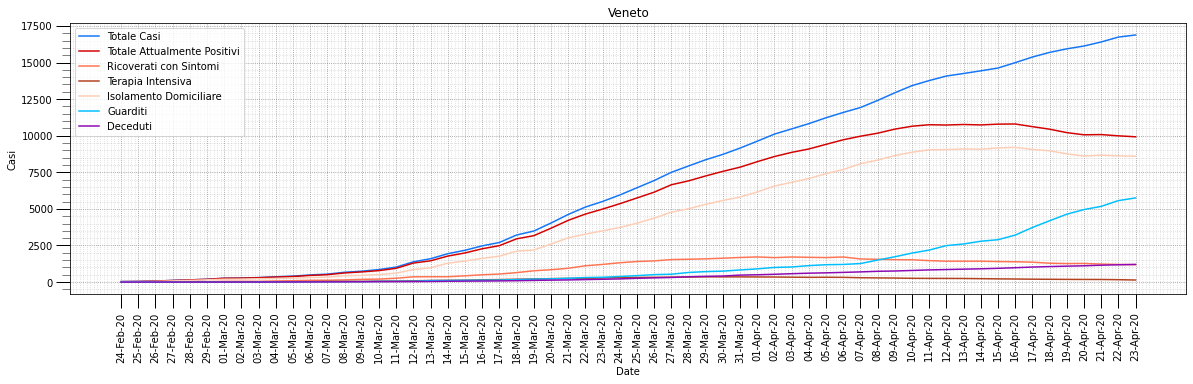

In [167]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

### Lombardia andamento quotidiano

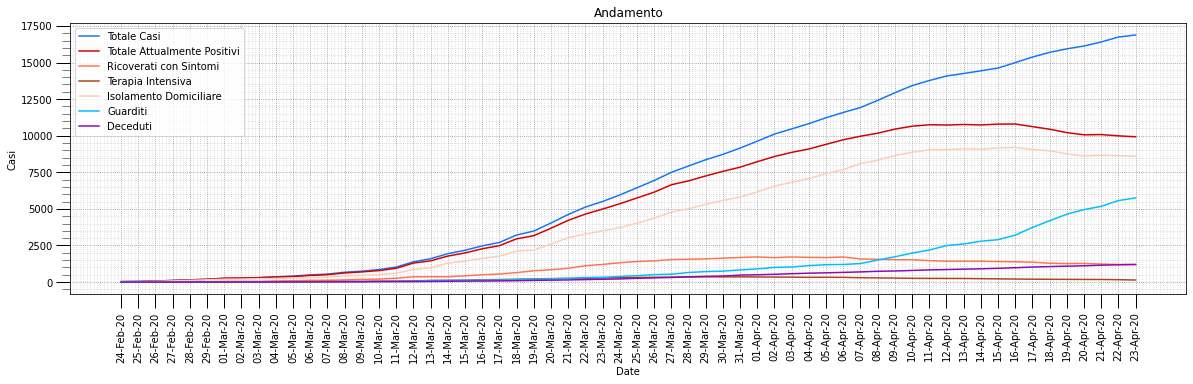

In [168]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]

fig, ax = plt.subplots()
for j,p in enumerate(plot):
    plt.plot(regions_data['Lombardia'].index, regions_data[r][p], color=colors[j], label=legends[j])
ax.set_title('Andamento')
ax.set_ylabel('Casi')
ax.set_xticklabels(regions_data['Lombardia'].index, rotation=90)    
beautify_graph(ax)

In [169]:
lombardia = regions_data['Lombardia']

In [170]:
incremental_data = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = lombardia[c]
    else:
        incremental_data[c] = lombardia[c] - lombardia[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [171]:
show_table(incremental_data,7)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
data                                                                     
17-Apr-20         1041             344      454       243         -790   
18-Apr-20         1246             761      286       199         -609   
19-Apr-20          855             302      390       163          275   
20-Apr-20          735              90      482       163         -225   
21-Apr-20          960            -609     1366       203         -383   
22-Apr-20         1161             264      736       161         -147   
23-Apr-20         1073            -369     1242       200         -527   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
data                                                         
17-Apr-20        -729           -61           1134    10839  
18-Apr-20        -585           -24           1370    11818  
19-Apr-20         300           -25             27     8824  
20-Apr-20        -204           -21            315     6331  
21-Apr-20        -333           -50           -226     6711  
22-Apr-20        -113           -34            411    13502  
23-Apr-20        -500           -27            158    12016

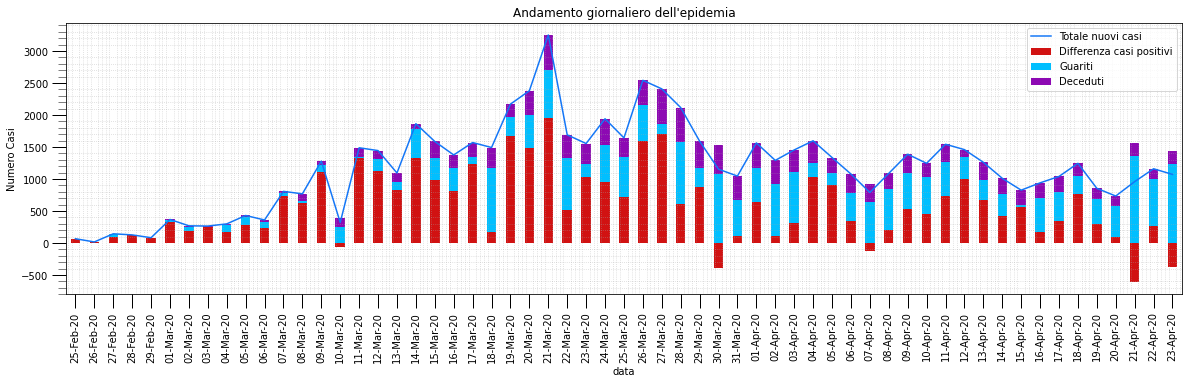

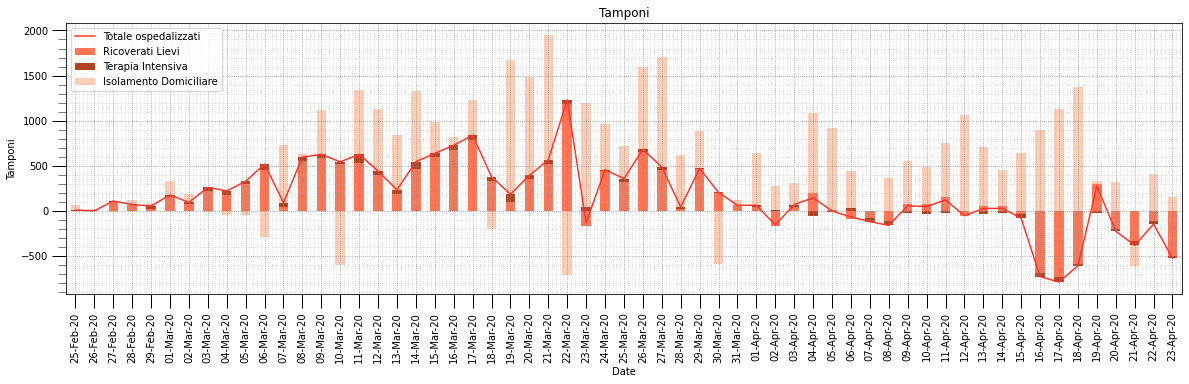

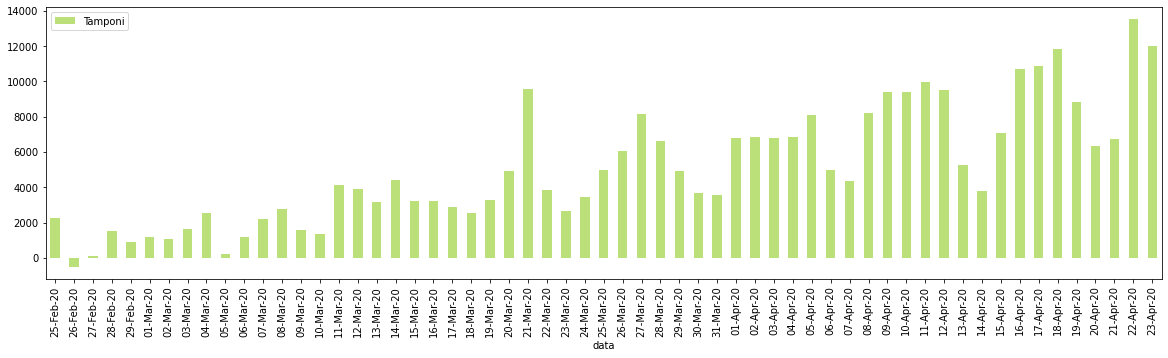

In [172]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['nuovi_attualmente_positivi','dimessi_guariti','deceduti']
legends = ["Differenza casi positivi","Guariti","Deceduti"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar',  y=plot, color=colors, rot=90, label=legends, stacked=True, ax=ax)

legends = ["Totale ospedalizzati"]
colors = [COL_TOT_RICOVERATI]
aw = incremental_data.plot(kind='line', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', y=plot, color=colors, rot=90, stacked=True, label=legends, ax=aw)
aw.set_title("Andamento giornalie della tipologia di decorso")
aw.set_ylabel('Numero Casi')
beautify_graph(aw)

plot =['tamponi']
legends = ["Tamponi"]
colors = [COL_TAMPONI,]
az = incremental_data.plot(kind='bar', y=plot, color=colors, rot=90, stacked=True, label=legends)
aw.set_title("Tamponi")
aw.set_ylabel('Tamponi')
beautify_graph(aw)